# Computer Vision - Optical Character Recognition (OCR) Exercise

## OCR on Text via Tesseract

### Tesseract Installation

You can use this [link](https://github.com/UB-Mannheim/tesseract/wiki)

In [34]:
## Uncomment the line below if you still need to install the pytesseract, opencv
#!pip install pytesseract
#!pip install opencv-contrib-python

In [35]:
# import the necessary packages
import matplotlib.pyplot as plt
import pytesseract
import cv2

In [36]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [37]:
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image to be OCR'd")
# ap.add_argument("-d", "--digits", type=int, default=1,
# 	help="whether or not *digits only* OCR will be performed")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "apple_support.png",
	"digits": 1,
}

0
1-800-275-2273



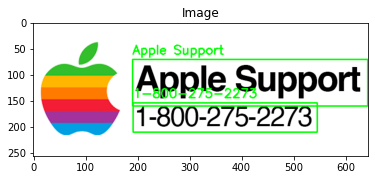

In [38]:
# load the input image, convert it from BGR to RGB channel ordering,
# and initialize our Tesseract OCR options as an empty string
image = cv2.imread(args["image"])
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
options = ""

# check to see if *digit only* OCR should be performed, and if so,
# update our Tesseract OCR options
if args["digits"] > 0:
    options = "outputbase digits"

# OCR the input image using Tesseract
#C:\Program Files\Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(rgb, config=options)
print(text)
plt_imshow("Image", image)

## OCR on Text via EasyOCR

In [39]:
!pip install easyocr

In [40]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import argparse
import cv2

In [41]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [42]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image to be OCR'd")
#ap.add_argument("-l", "--langs", type=str, default="en",
#	help="comma separated list of languages to OCR")
#ap.add_argument("-g", "--gpu", type=int, default=-1,
#	help="whether or not GPU should be used")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "images/arabic_sign.jpg",
	"langs": "en,ar",
	"gpu": 1
}

In [43]:
%%time

# break the input languages into a comma separated list
langs = args["langs"].split(",")
print("[INFO] OCR'ing with the following languages: {}".format(langs))

# load the input image from disk
image = cv2.imread(args["image"])

# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
reader = Reader(langs, gpu=args["gpu"] > 0)
results = reader.readtext(image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing with the following languages: ['en', 'ar']
[INFO] OCR'ing input image...
Wall time: 7.19 s


In [44]:
# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	text = cleanup_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

[INFO] 0.9994: EXIT
[INFO] 0.9831: خروج


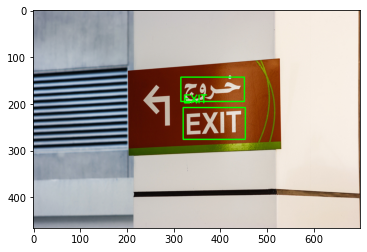

In [45]:
# show the output image
plt.imshow(image)

In [46]:
import glob

reader = Reader(langs, gpu=args["gpu"] > 0)

import os
root = './images'
for file in os.listdir("./images"):
    if file.endswith(".jpg"):
        # load the input image from disk
        image = cv2.imread(os.path.join(root,file))

        # OCR the input image using EasyOCR
        print("[INFO] OCR'ing input image..." + file)
        results = reader.readtext(image)
        
        # loop over the results
        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            print("[INFO] {:.4f}: {}".format(prob, text))

            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))

            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            text = cleanup_text(text)
            cv2.rectangle(image, tl, br, (0, 255, 0), 2)
            cv2.putText(image, text, (tl[0], tl[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            
        cv2.imwrite('./results/'+file, image)
        plt.imshow(image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...170px-ReceiptSwiss.jpg
[INFO] 0.0240: &rosi 9haidnsg
[INFO] 0.0132: !47/.{#0/0!;1011|
[INFO] 0.0155: 1 ٦ ٢١،
[INFO] 0.0044: ٧1٤0
[INFO] 0.0010: اا ما ٣
[INFO] OCR'ing input image...AcclaimedCV1.jpg
[INFO] 0.4905: KA
[INFO] 0.9994: KEVIN
[INFO] 0.9739: ANDERSON
[INFO] 0.6856: Kundersongemoil com
[INFO] 0.9992: 123-555-1234
[INFO] 0.6464: 123 Purk Avenue Eig Rupids, MI 68965
[INFO] 0.8543: PROFESSIONAL
[INFO] 0.2584: Highly umbi-ious Accountoni with obockground in soles, muering ond
[INFO] 0.9993: SUMMARY
[INFO] 0.3602: odverfising  Epertise in morket onolysis, forecosiing ond client needs
[INFO] 0.3300: ossessments,
[INFO] 0.4320: WORK HISTORY
[INFO] 0.8402: Accounling Monager
[INFO] 0.5102: ٨٤ 
[INFO] 0.5343: Accouniing
[INFO] 0.1799: 819
[INFO] 0.9995: 11/2018
[INFO] 0.6559: CURREVT
[INFO] 0.4638: Rupios, Michigen
[INFO] 0.3790: Supporled Chief Operoting Officer with doily operolionol functions.
[INFO] 0.2364: Reseorched ond updoled ollrequired motenols ne